In [3]:
import sys
import cv2
import os
from sys import platform
import argparse

In [4]:
dir_path = os.path.dirname(os.path.abspath(''))
try:
    # Windows Import
    if platform == "win32":
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append(dir_path + './python/openpose/Release');
        os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '/../../x64/Release;' +  dir_path + '/../../bin;'
        import pyopenpose as op
    else:
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append('./python');
        # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
        # sys.path.append('/usr/local/python')
        from openpose import pyopenpose as op
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    raise e

In [34]:
  # Flags
parser = argparse.ArgumentParser()
parser.add_argument("--image_path", default="./media/squat/index.jpeg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
parser.add_argument("--3d")
args = parser.parse_known_args()

# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "./models/"

In [35]:
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()


# Process Image
datum = op.Datum()
imageToProcess = cv2.imread(args[0].image_path)
datum.cvInputData = imageToProcess
opWrapper.emplaceAndPop(op.VectorDatum([datum]))

# Display Image
print("Body keypoints: \n" + str(datum.poseKeypoints.shape))
# cv2.imshow("OpenPose 1.7.0 - Tutorial Python API", datum.cvOutputData)
# cv2.waitKey(0)

Body keypoints: 
(1, 25, 3)


In [70]:
poseModel = op.PoseModel.BODY_25
pairs = op.getPosePartPairs(poseModel)
print(op.getPosePartPairs(poseModel))
print(op.getPoseBodyPartMapping(poseModel))

[1, 8, 1, 2, 1, 5, 2, 3, 3, 4, 5, 6, 6, 7, 8, 9, 9, 10, 10, 11, 8, 12, 12, 13, 13, 14, 1, 0, 0, 15, 15, 17, 0, 16, 16, 18, 2, 17, 5, 18, 14, 19, 19, 20, 14, 21, 11, 22, 22, 23, 11, 24]
{0: 'Nose', 1: 'Neck', 2: 'RShoulder', 3: 'RElbow', 4: 'RWrist', 5: 'LShoulder', 6: 'LElbow', 7: 'LWrist', 8: 'MidHip', 9: 'RHip', 10: 'RKnee', 11: 'RAnkle', 12: 'LHip', 13: 'LKnee', 14: 'LAnkle', 15: 'REye', 16: 'LEye', 17: 'REar', 18: 'LEar', 19: 'LBigToe', 20: 'LSmallToe', 21: 'LHeel', 22: 'RBigToe', 23: 'RSmallToe', 24: 'RHeel', 25: 'Background'}


1 8
1 2
1 5
2 3
3 4
5 6
6 7
8 9
9 10
10 11
8 12
12 13
13 14
1 0
0 15
15 17
0 16
16 18
18
2 17
5 18
18
14 19
19 20
14 21
11 22
22 23
11 24


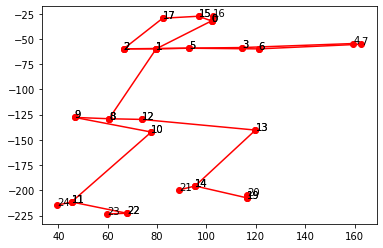

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(datum.poseKeypoints[0], columns=['x', 'y', 'score'])
df = df[df['score'] > 0]
df['yinv'] = -df['y']

for i in range(0, len(pairs), 2):
    first_point = pairs[i]
    second_pont = pairs[i+1]
    print(first_point, second_pont)
    try:
        x = df.loc[first_point]['x']
        x2 = df.loc[second_pont]['x']
        y = df.loc[first_point]['yinv']
        y2 = df.loc[second_pont]['yinv']

        plt.plot([x, x2], [y, y2], 'ro-')
        plt.annotate(first_point, xy=(x,y))
        plt.annotate(second_pont, xy=(x2,y2))
    except Exception as e:
        print(e)

# df.plot(x='x', y='yinv',kind='scatter')